# Defining the Hypotheses

* H1: Species of penguins are associated with certain island they inhabit.
* H2: Culmen length is associated with culmen depth.
* H3: Species of penguins are associated with flipper length.
* H4: Sex of a penguin is associated with body mass of a penguin.


# Setting up the environment

In [1]:
#Loading packages

library(tidyverse) 
library(janitor)
library(ggplot2)
library(psych)
library(dplyr)
install.packages("dunn.test")
library(dunn.test)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
#loading the dataset and cleaning the variable names
penguins_iter<-read.csv("/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv")
penguins_iter<-clean_names(penguins_iter)

In [4]:
#exploring dataset
str(penguins_iter)


'data.frame':	344 obs. of  17 variables:
 $ study_name       : chr  "PAL0708" "PAL0708" "PAL0708" "PAL0708" ...
 $ sample_number    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ species          : chr  "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" ...
 $ region           : chr  "Anvers" "Anvers" "Anvers" "Anvers" ...
 $ island           : chr  "Torgersen" "Torgersen" "Torgersen" "Torgersen" ...
 $ stage            : chr  "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" ...
 $ individual_id    : chr  "N1A1" "N1A2" "N2A1" "N2A2" ...
 $ clutch_completion: chr  "Yes" "Yes" "Yes" "Yes" ...
 $ date_egg         : chr  "11/11/07" "11/11/07" "11/16/07" "11/16/07" ...
 $ culmen_length_mm : num  39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ culmen_depth_mm  : num  18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int  181 186 195 NA 193 190

In [5]:
# removing latin names for penguin species
penguins_iter$species<-gsub("\\s*\\(.*\\)", "",penguins_iter$species )
unique(penguins_iter$species)

[1] "Adelie Penguin"    "Chinstrap penguin" "Gentoo penguin"

# Descriptive statistics

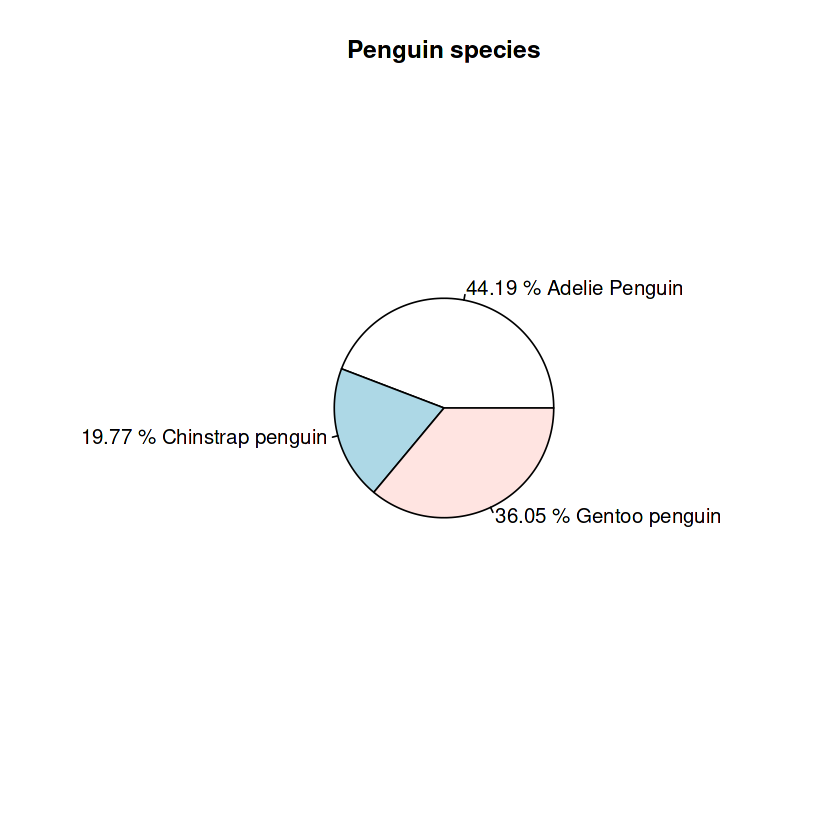

In [6]:
species_counts_pie_chart <- table(penguins_iter$species)
species_counts_pie_chart_percent<-species_counts_pie_chart/sum(species_counts_pie_chart ) *100
# Plotting the pie chart
pie(species_counts_pie_chart, 
        labels = paste(round(species_counts_pie_chart_percent,2),"%", names(species_counts_pie_chart)),
        main = "Penguin species")

From above pie chart, we see that we have 44,19% of Adelie species, 19,77% Chinstrap species, and 36,05 % Gentoo species in penguins dataset. 

### Penguins species and region they populate
##### Table 

In the sample dataset, we have 344 penguins. The number or penguins within species and islands are shown in following table:  

In [7]:
species_island_table<-table(penguins_iter$species, penguins_iter$island)

species_island_table <- rbind(species_island_table, Total = colSums(species_island_table))

# Add a column for total values
species_island_table <- cbind(species_island_table, Total = rowSums(species_island_table))
species_island_table

,Biscoe,Dream,Torgersen,Total
Adelie Penguin,44,56,52,152
Chinstrap penguin,0,68,0,68
Gentoo penguin,124,0,0,124
Total,168,124,52,344


### Penguins region

In [8]:
table(penguins_iter$species, penguins_iter$region)

                   
                    Anvers
  Adelie Penguin       152
  Chinstrap penguin     68
  Gentoo penguin       124

All samples are collected from the same region, Anvers.

### Penguins culmen length in mm
##### Table

In [9]:
# STSTISTICS SUMMARY FOR CULMEN LENGTH AMONG SPECIES
summary_stats <- penguins_iter %>%
  group_by(species) %>%
  summarize(
    min = min(culmen_length_mm, na.rm = TRUE),
    Q1 = quantile(culmen_length_mm, probs = 0.25, na.rm=TRUE),
    median = median(culmen_length_mm, na.rm=TRUE),
    mean = mean(culmen_length_mm, na.rm = TRUE),
    Q3 = quantile(culmen_length_mm, probs = 0.75, na.rm = TRUE),
    max = max(culmen_length_mm, na.rm = TRUE)
  )

# Print the summary statistics table
print(summary_stats)

# A tibble: 3 × 7
  species             min    Q1 median  mean    Q3   max
  <chr>             <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>
1 Adelie Penguin     32.1  36.8   38.8  38.8  40.8  46  
2 Chinstrap penguin  40.9  46.3   49.6  48.8  51.1  58  
3 Gentoo penguin     40.9  45.3   47.3  47.5  49.6  59.6


We see, that on average, the Adelie Penguins have the shortest culmen length compared to other two species.

### Penguins culmen length in mm
##### Boxplot

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


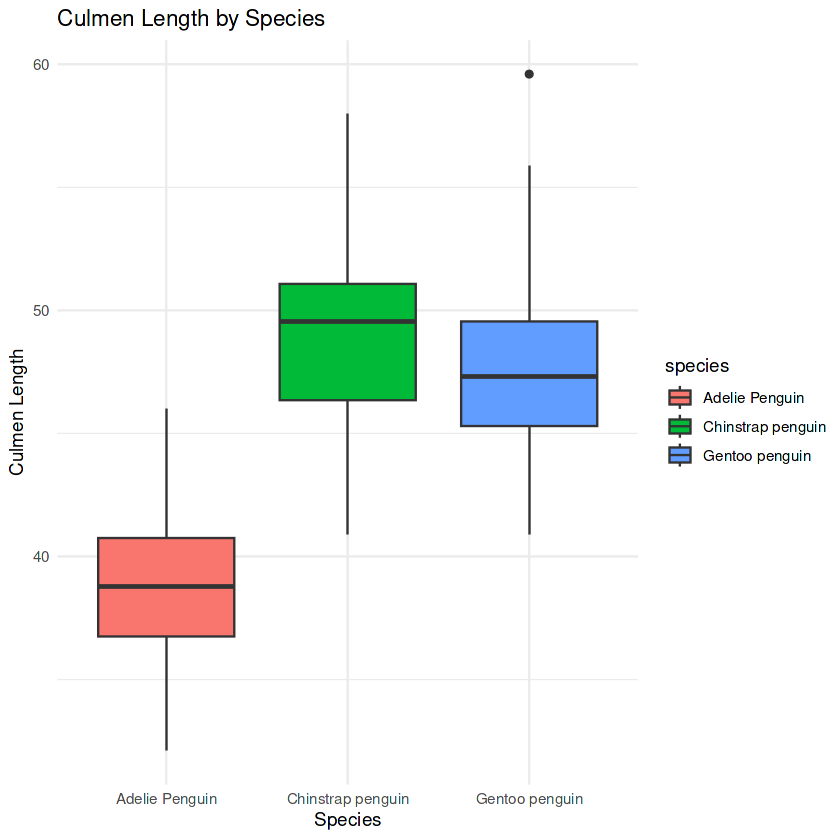

In [10]:
ggplot(penguins_iter, aes(x = species, y = culmen_length_mm,fill = species)) +
  geom_boxplot() +
  labs(
    title = "Culmen Length by Species",
    x = "Species",
    y = "Culmen Length"
  )+
theme_minimal()

### Penguins culmen depth in mm
##### Table

In [11]:

summary_stats_culmen_depth <- penguins_iter %>%
  group_by(species) %>%
  summarize(
    min = min(culmen_depth_mm, na.rm = TRUE),
    Q1 = quantile(culmen_depth_mm, probs = 0.25, na.rm=TRUE),
    median = median(culmen_depth_mm, na.rm=TRUE),
    mean = mean(culmen_depth_mm, na.rm = TRUE),
    Q3 = quantile(culmen_depth_mm, probs = 0.75, na.rm = TRUE),
    max = max(culmen_depth_mm, na.rm = TRUE)
  )

# Print the summary statistics table
print(summary_stats_culmen_depth)

# A tibble: 3 × 7
  species             min    Q1 median  mean    Q3   max
  <chr>             <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl>
1 Adelie Penguin     15.5  17.5   18.4  18.3  19    21.5
2 Chinstrap penguin  16.4  17.5   18.4  18.4  19.4  20.8
3 Gentoo penguin     13.1  14.2   15    15.0  15.7  17.3


### Penguins culmen depth in mm
##### Boxplot

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


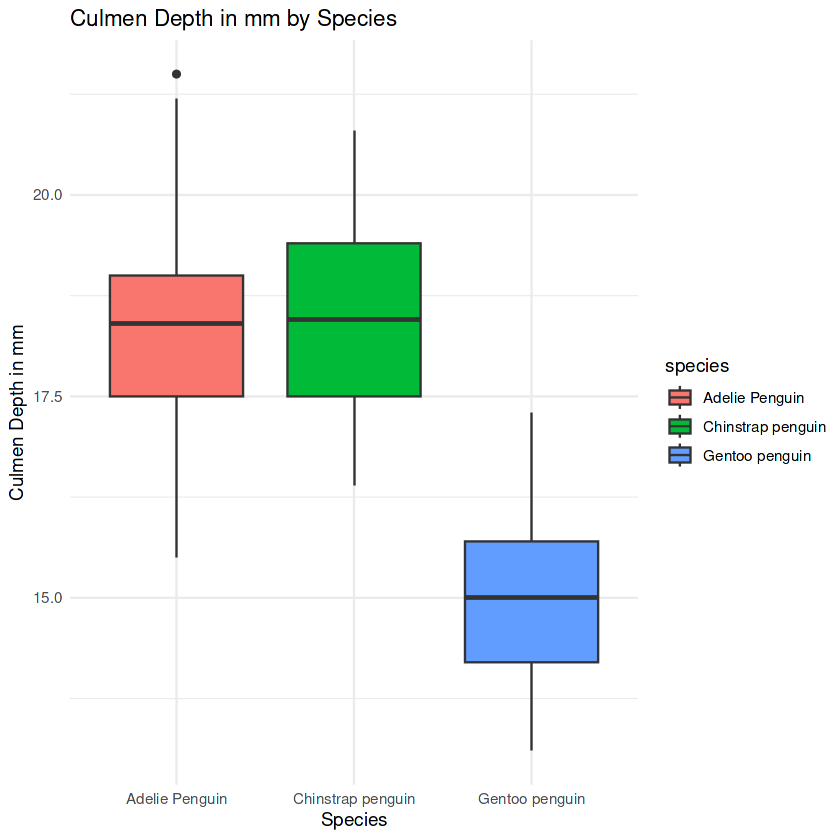

In [12]:
ggplot(penguins_iter, aes(x = species, y = culmen_depth_mm, fill = species)) +
  geom_boxplot() +
  labs(
    title = "Culmen Depth in mm by Species",
    x = "Species",
    y = "Culmen Depth in mm"
  )+
theme_minimal()

Gentoo pengins have on average the smallest culmen depth (narrowest). 

### Penguins flipper length in mm
##### Table

In [13]:
summary_stats_flipper_length <- penguins_iter %>%
  group_by(species) %>%
  summarize(
    min = min(flipper_length_mm, na.rm = TRUE),
    Q1 = quantile(flipper_length_mm, probs = 0.25, na.rm=TRUE),
    median = median(flipper_length_mm, na.rm=TRUE),
    mean = mean(flipper_length_mm, na.rm = TRUE),
    Q3 = quantile(flipper_length_mm, probs = 0.75, na.rm = TRUE),
    max = max(flipper_length_mm, na.rm = TRUE)
  )

# Print the summary statistics table
print(summary_stats_flipper_length)

# A tibble: 3 × 7
  species             min    Q1 median  mean    Q3   max
  <chr>             <int> <dbl>  <dbl> <dbl> <dbl> <int>
1 Adelie Penguin      172   186    190  190.   195   210
2 Chinstrap penguin   178   191    196  196.   201   212
3 Gentoo penguin      203   212    216  217.   221   231


### Penguins flipper length in mm
##### Boxplot

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


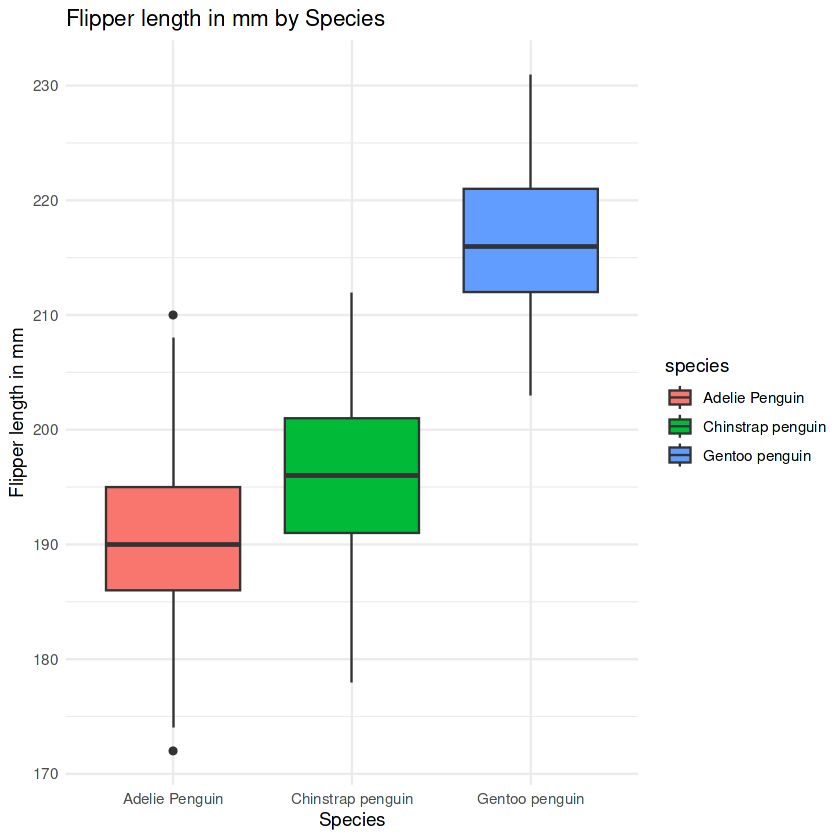

In [14]:
ggplot(penguins_iter, aes(x = species, y = flipper_length_mm, fill = species)) +
  geom_boxplot() +
  labs(
    title = "Flipper length in mm by Species",
    x = "Species",
    y = "Flipper length in mm"
  )+
theme_minimal()

### Body mass in grams 
#### Table

In [15]:
summary_stats_body_mass <- penguins_iter %>%
  group_by(species) %>%
  summarize(
    min = min(body_mass_g, na.rm = TRUE),
    Q1 = quantile(body_mass_g, probs = 0.25, na.rm=TRUE),
    median = median(body_mass_g, na.rm=TRUE),
    mean = mean(body_mass_g, na.rm = TRUE),
    Q3 = quantile(body_mass_g, probs = 0.75, na.rm = TRUE),
    max = max(body_mass_g, na.rm = TRUE)
  )

# Print the summary statistics table
print(summary_stats_body_mass)

# A tibble: 3 × 7
  species             min    Q1 median  mean    Q3   max
  <chr>             <int> <dbl>  <dbl> <dbl> <dbl> <int>
1 Adelie Penguin     2850 3350    3700 3701.  4000  4775
2 Chinstrap penguin  2700 3488.   3700 3733.  3950  4800
3 Gentoo penguin     3950 4700    5000 5076.  5500  6300


### Body mass in g
##### Boxplot

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


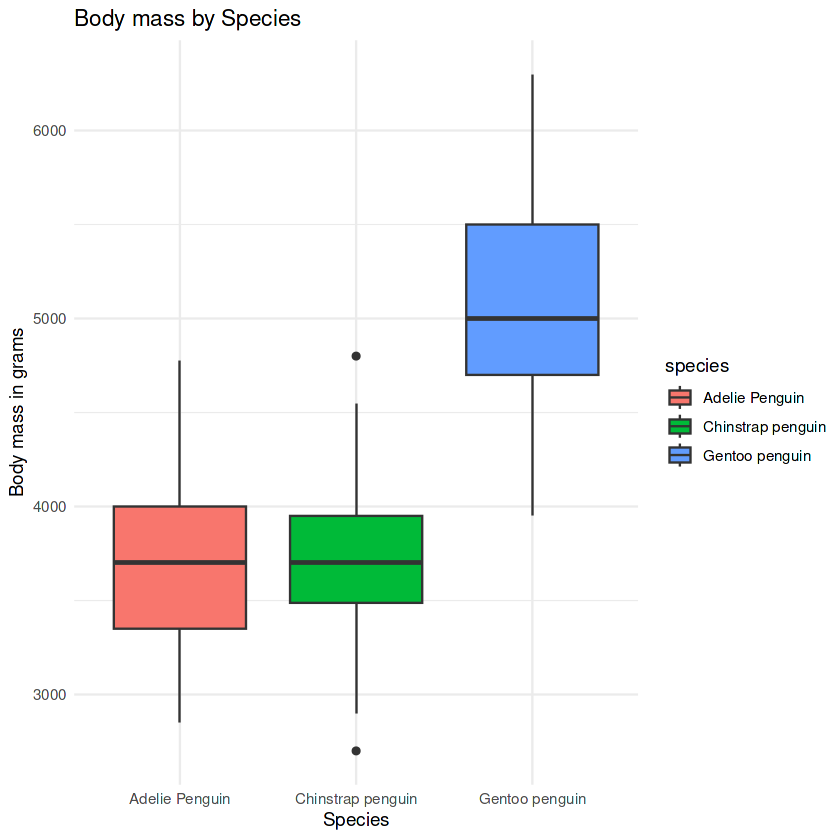

In [16]:
ggplot(penguins_iter, aes(x = species, y = body_mass_g, fill = species)) +
  geom_boxplot() +
  labs(
    title = "Body mass by Species",
    x = "Species",
    y = "Body mass in grams"
  )+
theme_minimal()

# Hypotheses testing
### H1: Species of penguins are associated with certain islands.

First we want to show the two variables in a crosstabulation form. And, since both variables are categorical, we will test the association between the two with pearson's Chi-Squared test. Under, we can see the table. The first number in a cell of a table represents the number of penguins: 44 Adelie penguins inhabit the Biscoe island, 56 Adelie Penguins inhabit Dream island, and 52 Adelie penguins inhabit Torgersen island. Same interpretation goes for other two species. 
28,9% of all Adelie species penguins live on Biscoe island, and 26,2% of all penguins that inhabit the Biscoe island, are from Adelie species. We can also see, that in the complete dataset, there are 12,8% of penguins that are Adelie and live on Biscoe island. 

In [17]:
library(gmodels)
CrossTable(penguins_iter$species, penguins_iter$island)

chisq.test(penguins_iter$species, penguins_iter$island) 


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  344 

 
                      | penguins_iter$island 
penguins_iter$species |    Biscoe |     Dream | Torgersen | Row Total | 
----------------------|-----------|-----------|-----------|-----------|
       Adelie Penguin |        44 |        56 |        52 |       152 | 
                      |    12.313 |     0.027 |    36.661 |           | 
                      |     0.289 |     0.368 |     0.342 |     0.442 | 
                      |     0.262 |     0.452 |     1.000 |           | 
                      |     0.128 |     0.163 |     0.151 |           | 
----------------------|-----------|-----------|-----------|-----------|
    Chinstrap penguin |         0 |        68 |         0 |        68 | 
                      |    33.209 |    77.


	Pearson's Chi-squared test

data:  penguins_iter$species and penguins_iter$island
X-squared = 299.55, df = 4, p-value < 2.2e-16


Since the p-value is much smaller than any conventional significance level (e.g., 0.05), we reject the null hypothesis. In simpler terms, it means that there is strong evidence to suggest that the observed association between penguin species and islands is not due to chance alone. In other words, the species of penguins are significantly associated with certain islands.

This result could be interpreted as indicating that different species of penguins tend to inhabit specific islands rather than being randomly distributed across the islands. 

The island Torgersen is inhabitat solely with Adelie penguns, Chinstrap penguins all live on Dream island, and all Gentoo penguins inhabit Biscoe island. Only Adelie penguins inhabit all three islands.
We can say, that the species of a penguins is associated with the island they inhabit.





### H2: Culmen length is associated with culmen depth
In this case, we have two numerical variables. First, we will examine whether both variables are distributed according to a normal distribution or some other distribution. In doing so, we consider both the difference between the mean and median, as well as skewness and kurtosis, which tell us how symmetrical and peaked the approximation curve fitting the histogram with actual data is. To assess whether a variable is distributed according to a normal distribution law, we need to, of course, also examine the graphical presentation of data (histogram) itself and the results obtained with test of normality. The two test of normality are used for this purpose: 
* the Kolmogorov–Smirnov test,
* and the Shapiro–Wilk test.

In [18]:

describe(penguins_iter$culmen_length_mm)
describe(penguins_iter$culmen_depth_mm)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,342,43.92193,5.459584,44.45,43.90693,7.04235,32.1,59.6,27.5,0.05265303,-0.8931397,0.2952205


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,342,17.15117,1.974793,17.3,17.17263,2.2239,13.1,21.5,8.4,-0.1422086,-0.9233523,0.1067846


In this case - for culmen_length variable, the skewness value suggests nearly symmetric distribution, while the negative kurtosis value, suggests a flatter distribution compared to a normal distribution.

In the case of a culmen depth, the skewness indicates asymmetrical distribution (left skewed), and kurtosis indicates that our datas distribution may be flatter than normal distribution. 

Lets check density plots for both variables.









Warning message:
“Removed 2 rows containing non-finite values (`stat_density()`).”


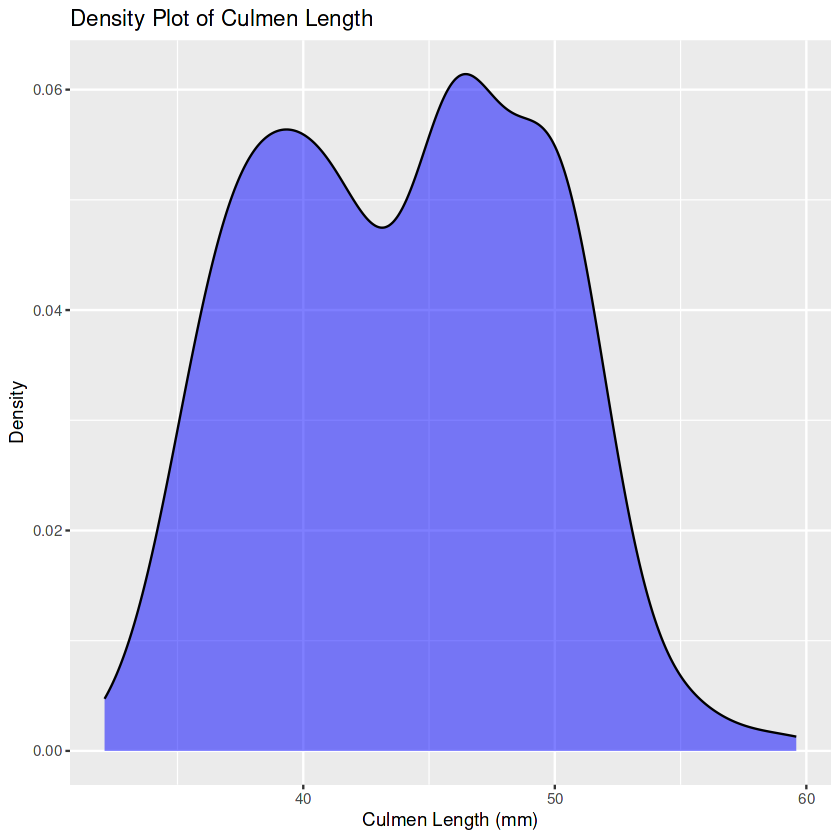

In [19]:
ggplot(penguins_iter, aes(x = culmen_length_mm)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(
    title = "Density Plot of Culmen Length",
    x = "Culmen Length (mm)",
    y = "Density"
  )

Warning message:
“Removed 2 rows containing non-finite values (`stat_density()`).”


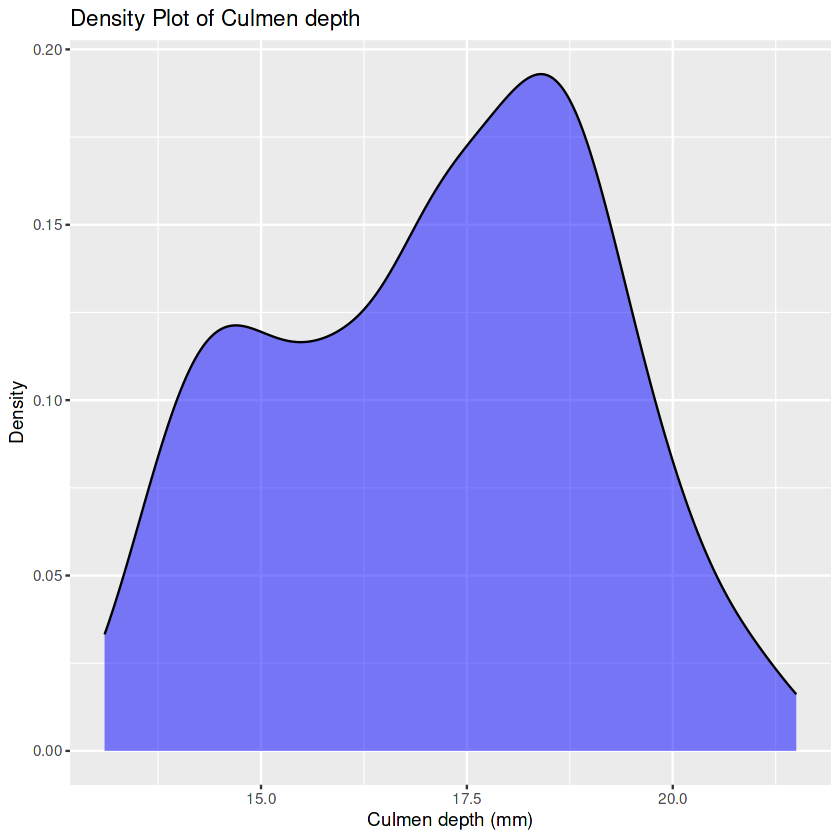

In [20]:
ggplot(penguins_iter, aes(x = culmen_depth_mm)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(
    title = "Density Plot of Culmen depth",
    x = "Culmen depth (mm)",
    y = "Density"
  )

Based on a so far examination, we could say that non of the two variables has normal distribution. In both plots, we can se that there are two peaks, this indicates the distribution is not normal. Below we will perform SHapiro Wilking test of normality to confirm our findings.

In [21]:
#Shapiro Wilkins test for testing of normality of the two variable.
shapiro.test(penguins_iter$culmen_length_mm)
shapiro.test(penguins_iter$culmen_depth_mm)



	Shapiro-Wilk normality test

data:  penguins_iter$culmen_length_mm
W = 0.97485, p-value = 1.12e-05



	Shapiro-Wilk normality test

data:  penguins_iter$culmen_depth_mm
W = 0.97258, p-value = 4.419e-06


Shapiro Wilkinson normality test shows significant result, meaning that the difference between normal distribution, and distribution of our two variables, is statistically significant. Variables culmen depth and culmen length do not have normal distribution. 

In this case, where we have two numerical variables that are not normally distributed,  we can use non parametric correlation test - Spearman's correlation test.

In [22]:
correlation_result <- cor.test(penguins_iter$culmen_length_mm, penguins_iter$culmen_depth_mm, method = "spearman")
print(correlation_result)

Warning message in cor.test.default(penguins_iter$culmen_length_mm, penguins_iter$culmen_depth_mm, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  penguins_iter$culmen_length_mm and penguins_iter$culmen_depth_mm
S = 8145268, p-value = 3.512e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2217492 



Based on a Spearman correlation test, we got an approximate p-value that shows significance. Sample estimates show weak negative correlation between the two variables. Meaning when the culmen length increases, the culmen depth slightly decreases, and vice versa. 
We got esimate p-value, due to ties in our sample. 
To support the result, we can also use another test that accounts for ties - Kendall Tau correlation coeficient. 

In [23]:
correlation_result_kendall_tau <- cor.test(penguins_iter$culmen_length, penguins_iter$culmen_depth, method = "kendall")

# Print the correlation coefficient and p-value
print(correlation_result_kendall_tau)


	Kendall's rank correlation tau

data:  penguins_iter$culmen_length and penguins_iter$culmen_depth
z = -3.3575, p-value = 0.0007864
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1228502 



This test suports the results of the Spearman's test, indicating a weak negative correlation between the two variables.

For further analysis, we should partition the dataset into three groups based on penguin species and then test for associations between culmen length and culmen depth.

### H3: Species of penguins are associated with flipper length.
Here we have one numerical variable and one categorical variable with more than two levels. In order to choose the right test, we have to do a normality test within the levels of categorical variable.
We have to test if variable flipper length has a normal distribution for each of the three penguns species. 


In [24]:


penguins_iter %>%
  group_by(species) %>%
  summarise(shapiro_test_p_value = shapiro.test(flipper_length_mm)$p.value)


species,shapiro_test_p_value
<chr>,<dbl>
Adelie Penguin,0.720046617
Chinstrap penguin,0.810644659
Gentoo penguin,0.001619814


These results suggest that the flipper length data within the Adelie Penguin and Chinstrap Penguin species groups may be reasonably assumed to be normally distributed, while the data within the Gentoo Penguin species group may not follow a normal distribution.
In this case, we will do a Kruskall-Wallis non parametric test.

In [25]:

kruskal.test(flipper_length_mm ~ species, data = penguins_iter)



	Kruskal-Wallis rank sum test

data:  flipper_length_mm by species
Kruskal-Wallis chi-squared = 244.89, df = 2, p-value < 2.2e-16


Since the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that there is a significant difference in flipper length among at least one pair of species.

In other words, we can infer that the flipper lengths of the different penguin species are not all equal. 
To determine which specific pairs of species differ significantly in terms of flipper length, we will perform post-hoc pairwise comparisons using Dunn's test with Bonferroni correction.

In [26]:
dunn.test <- dunn.test(penguins_iter$flipper_length_mm, g = penguins_iter$species, method = "bonferroni")

print(dunn.test)


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 244.8905, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Adelie P   Chinstra
---------+----------------------
Chinstra |  -3.629336
         |    0.0004*
         |
Gentoo p |  -15.47661  -8.931938
         |    0.0000*    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2
$chi2
[1] 244.8905

$Z
[1]  -3.629336 -15.476612  -8.931938

$P
[1] 1.420754e-04 2.495366e-54 2.093050e-19

$P.adjusted
[1] 4.262263e-04 7.486099e-54 6.279150e-19

$comparisons
[1] "Adelie Penguin - Chinstrap penguin" "Adelie Penguin - Gentoo penguin"   
[3] "Chinstrap penguin - Gentoo penguin"



based on the results of a Dunn test, we can conclude that the flipper length differs significalntly among the species. 
* Adelie Penguin vs. Chinstrap Penguin: The difference in ranks is -3.629336, indicating that, on average, Chinstrap penguins tend to have larger flipper lengths compared to Adelie penguins.

* Adelie Penguin vs. Gentoo Penguin: The difference in ranks is -15.476612, indicating that, on average, Gentoo penguins tend to have larger flipper lengths compared to Adelie penguins.

* Chinstrap Penguin vs. Gentoo Penguin: The difference in ranks is -8.931938, indicating that, on average, Gentoo penguins tend to have larger flipper lengths compared to Chinstrap penguins.

Adelie penguins tend to have the smallest flipper length among the three species, and Gentoo penguins tend to have the longest. 

### H4: Sex of a penguin is associated with body mass of a penguin.
We want to inspect wheter the sex of a penguins affects the body mass of a penguin. As in the case before, firstly, we have to do a test of normality for numerical variable body mass within both levels (male, female) of a categorical variable sex. 

In [27]:
sum(is.na(penguins_iter$body_mass_g))

#penguins_iter[complete.cases(penguins_iter$body_mass_g), ] %>%
    #group_by(sex) %>%
         # summarise(shapiro_test_p_value = shapiro.test(body_mass_g)$p.value)
summary_stats_body_mass <- penguins_iter %>%
  group_by(species, sex) %>%
  summarize(
    min = min(body_mass_g, na.rm = TRUE),
    Q1 = quantile(body_mass_g, probs = 0.25, na.rm=TRUE),
    median = median(body_mass_g, na.rm=TRUE),
    mean = mean(body_mass_g, na.rm = TRUE),
    Q3 = quantile(body_mass_g, probs = 0.75, na.rm = TRUE),
    max = max(body_mass_g, na.rm = TRUE),
      no.penguins = n()
  )

# Print the summary statistics table
print(summary_stats_body_mass)
table(penguins_iter$sex)

[1] 2

`summarise()` has grouped output by 'species'. You can override using the
`.groups` argument.


# A tibble: 9 × 9
# Groups:   species [3]
  species           sex        min    Q1 median  mean    Q3   max no.penguins
  <chr>             <chr>    <int> <dbl>  <dbl> <dbl> <dbl> <int>       <int>
1 Adelie Penguin    ""        2975 3300    3475 3540  3700   4250           6
2 Adelie Penguin    "FEMALE"  2850 3175    3400 3369. 3550   3900          73
3 Adelie Penguin    "MALE"    3325 3800    4000 4043. 4300   4775          73
4 Chinstrap penguin "FEMALE"  2700 3362.   3550 3527. 3694.  4150          34
5 Chinstrap penguin "MALE"    3250 3731.   3950 3939. 4100   4800          34
6 Gentoo penguin    ""        4100 4375    4650 4492. 4688.  4725           4
7 Gentoo penguin    "."       4875 4875    4875 4875  4875   4875           1
8 Gentoo penguin    "FEMALE"  3950 4462.   4700 4680. 4875   5200          58
9 Gentoo penguin    "MALE"    4750 5300    5500 5485. 5700   6300          61



            . FEMALE   MALE 
    10      1    165    168 

We see we have empty strings and "." in sex variable. Together 11 instances. Before we perform the statistical test,  we will filter those out.

In [28]:
subset(penguins_iter, sex != "" & sex != ".") %>%
  group_by(species, sex) %>%
  summarise(shapiro_test_p_value = shapiro.test(body_mass_g)$p.value,
               n_penguins = n())


`summarise()` has grouped output by 'species'. You can override using the
`.groups` argument.


species,sex,shapiro_test_p_value,n_penguins
<chr>,<chr>,<dbl>,<int>
Adelie Penguin,FEMALE,0.1985303,73
Adelie Penguin,MALE,0.4159824,73
Chinstrap penguin,FEMALE,0.3055292,34
Chinstrap penguin,MALE,0.8910238,34
Gentoo penguin,FEMALE,0.5106595,58
Gentoo penguin,MALE,0.9850457,61


Because we have three different species of penguins, we separated them into their own groups. Then, we tested whether body mass follows a normal distribution within the male and female levels of the sex variable.

In the above results of the Shapiro test, we observed that body mass is normally distributed among females and males. Since we have two groups (male and female) and the distribution of body mass follows a normal distribution, we will perform a parametric independent T-test.

In [29]:


# Function to perform t-test for each species
perform_t_test <- function(data) {
  t_test_result <- t.test(body_mass_g ~ sex, data = data)
  return(t_test_result$p.value)
}

# Perform t-test for each species
t_test_results <- subset(penguins_iter, sex != "" & sex != ".") %>%
  group_by(species) %>%
  summarise(t_test_p_value = perform_t_test(.))

# Print the results
print(t_test_results)



# A tibble: 3 × 2
  species           t_test_p_value
  <chr>                      <dbl>
1 Adelie Penguin          4.79e-16
2 Chinstrap penguin       4.79e-16
3 Gentoo penguin          4.79e-16


Based on the results of T-test we can conclude that there is a significant influence of sex on a body mass among all three species. And from the table we printed above, we can say that males are on average heavier than females. 

# Conclusion
In this notebook, we conducted several statistical tests aiming to demonstrate the appropriate test selection based on variable types. Whenever dealing with numerical continuous variables, we initially assessed the normality test for each variable or within each level of categorical variables.

Based on these findings, we determined the suitable statistical test to examine the correlation between variables. Our hypothesis suggested a correlation between penguin species and the island they inhabit. We observed a weak negative association between culmen length and culmen depth.

To further investigate this hypothesis, we partitioned the dataset by species and performed additional statistical tests. Moreover, our analysis indicated that Adelie penguins typically exhibit the shortest flipper length, while Gentoo penguins tend to have the longest flippers on average.

Lastly, supporting our final hypothesis, we found that males, across all species, tend to be heavier than females.


# Literature

* Petra,Povalej Bržan, “Multivariate statistical Methods” (class lecture, Multivariate Statistical Methods, Faculty of Health Sciences, Maribor, 2014)
* Ivana, R. (2014). "ZAPOSLITEV IN OSEBNI DOHODEK". Multivariate ststistical methods. Faculty of Health Sciences.Unpublished essay.

